In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/rating.csv")

df

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


In [3]:
matrix = df.pivot(index='movieId', columns='userId', values='rating')

matrix = matrix.dropna(axis=1, how='all')

# Drop rows where all values are NaN
matrix = matrix.dropna(axis=0, how='all')

/var/folders/sz/96b_h5gn3y33k0c7jsvrstmm0000gn/T/ipykernel_10173/3548500641.py:1: PerformanceWarning: The following operation may generate 3703856792 cells in the resulting pandas object.
  matrix = df.pivot(index='movieId', columns='userId', values='rating')


In [4]:
matrix

userId,1,2,3,4,5,6,7,8,9,10,...,138484,138485,138486,138487,138488,138489,138490,138491,138492,138493
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,4.0,NaN,NaN,5.0,NaN,4.0,NaN,4.0,...,NaN,NaN,5.0,NaN,3.0,NaN,NaN,2.0,NaN,3.5
2,3.5,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,4.0
3,NaN,4.0,NaN,NaN,NaN,3.0,3.0,5.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Count missing values
na_count = matrix.isna().sum().sum()

# Total number of cells
total_cells = matrix.size

# Proportion of missing values
na_proportion = na_count / total_cells

print(f"Count of NaN: {na_count}")
print(f"Total cells: {total_cells}")
print(f"Proportion of NaN: {na_proportion:.2f}")

Count of NaN: 3683856529
Total cells: 3703856792
Proportion of NaN: 0.99


DEVIAMOS FAZER BAR PLOT PARA VER TP QUANTOS FILMES CADA PESSOA AVALIA E QTS FILMES SAO AVALIADOS POR PESSOAS DIFERENTES

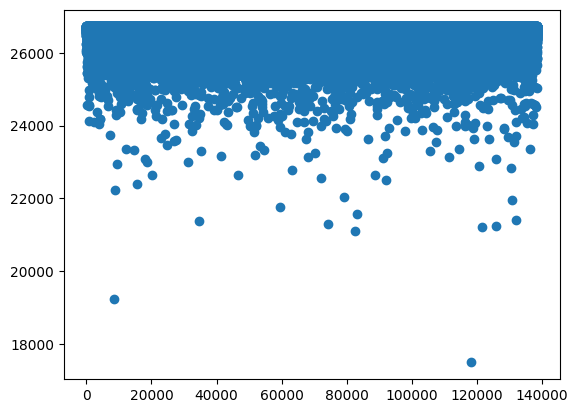

In [6]:
na_per_col = matrix.isna().sum(axis=0)
plt.scatter(range(len(na_per_col)), na_per_col) # qnt mais elevado, mais nan tem na coluna

In [7]:
# Filter columns with <= max_nans NaNs
filter_matrix = matrix.loc[:, matrix.isna().sum(axis=0) <= 26744 - 100]

In [8]:
# Count missing values
na_count = filter_matrix.isna().sum().sum()

# Total number of cells
total_cells = filter_matrix.size

# Proportion of missing values
na_proportion = na_count / total_cells

print(f"Count of NaN: {na_count}")
print(f"Total cells: {total_cells}")
print(f"Proportion of NaN: {na_proportion:.2f}")
print(f"Number of non Nan cells: {total_cells - na_count}")

Count of NaN: 1390584520
Total cells: 1406627424
Proportion of NaN: 0.99
Number of non Nan cells: 16042904


In [9]:
filter_matrix.iloc[:5, :5]

userId,1,3,7,11,14
movieId,,,,,
1,NaN,4.0,NaN,4.5,4.5
2,3.5,NaN,NaN,NaN,NaN
3,NaN,NaN,3.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN


In [10]:

value_counts = df['userId'].value_counts()
df_filtered = df[df['userId'].isin(value_counts[value_counts >= 100].index)]
df_filtered = df_filtered.drop('timestamp', axis=1)

print(df_filtered)


          userId  movieId  rating
0              1        2     3.5
1              1       29     3.5
2              1       32     3.5
3              1       47     3.5
4              1       50     3.5
...          ...      ...     ...
20000258  138493    68954     4.5
20000259  138493    69526     4.5
20000260  138493    69644     3.0
20000261  138493    70286     5.0
20000262  138493    71619     2.5

[16042904 rows x 3 columns]


In [11]:
df_filtered.to_csv("data/data.csv", index=False)

In [12]:
pd.read_csv("data/data.csv")

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
...,...,...,...
16042899,138493,68954,4.5
16042900,138493,69526,4.5
16042901,138493,69644,3.0
16042902,138493,70286,5.0
